# PercepTRON

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png)
<sub> Fuente: https://es.wikipedia.org/wiki/Perceptr%C3%B3n </sub>

Ya visto lo que es un perceptrón en la presentación, podemos proceder a implementar un perceptrón en código. El perceptrón nos permitirá modelar decisiones, según caracteristicas o pasos que pertenecen a la decisión. El perceptrón esta dividido en cuatro partes: 

- La  suma de la multiplicación entre las señales de entrada y los pesos.
- Las activaciones de la función de activación sobre la suma. 
- Calcular el error de las activaciones
- Actualizar los pesos según el error u optimización.


Vamos a implentarlos paso a paso.

## Suma ponderada

Lo primero es la suma de los productos entre los pesos $w$ y las entradas $x$, sumados por la predisposición o bias $b$.A esta suma le  llamamos $z$. Esto puede ser definido de dos maneras: 

- Como una sumatoria de los productos:

    $$z = \sum_{i=1}^{m} x \cdot w + b $$
    
- Como un producto punto entre dos matrices:

    $$z = X \cdot w  + b$$
    
siendo X una matriz con dimensiones (m,n) donde m es la cantidad de ejemplos o filas y n es la cantidad de dimensiones o variables;w es una matriz con dimensions (n,1) y b es una matriz con dimensiones (m,1). Como resultado de la multiplicación se obtiene una matriz con dimensiones (m,1), la cual contiene el resultado de la suma ponderada de cada fila. El bias es añadido a los datos X como una columna que tambien tendra su propio peso. Este metodo es más eficiente a la hora de calcular y funciona de maravilla aún con muchos ejemplos. Por lo tanto implementaremos este producto de vectores con la libreria de algebra lineal **Numpy**. 

In [10]:
import numpy as np #Primero importamos la libreria numpy. 
import pandas as pd
def suma_ponderada(X,w):
    #Funcion que retorna el producto punto entre la matriz de ejemplos X y la matriz de pesos w, sumado por el bias b.
    return np.dot(X,w)

El siguiente paso es la función de activación.

## Función de Activación

La función de activación es aquella que determina la solución final del perceptrón. Esta tiene que estar ajustada para que devuelva resultados de la misma magnitud que los resultados reales. Por ejemplo, si los resultados reales que tenemos son solamente $1$ y $0$, nuestra función de activación  tambien solo debe devolver $1$ y $0$ o numeros entre 1 y 0 para ser redondeados hacia el digito más cercano. Una función que hace exactamente esto es la función del  **paso unitario**. Su definición lo dice todo: 
$$f(z) = \begin{cases}
  0 \ \text{if }z < 0\\    
  1 \ \text{if }z \geq 0    
\end{cases}$$

Esto hace que cualquier entrada a la función resulte en un 1 o un 0 como salida. Podemos comprobar esto graficando la función misma para varios valores de z. Para graficar podemos utilizar la libreria **matplotlib** en conjunto con la libreria **seaborn** para hacer graficas que no causen ganas de haber visto el eclipse sin protección. 

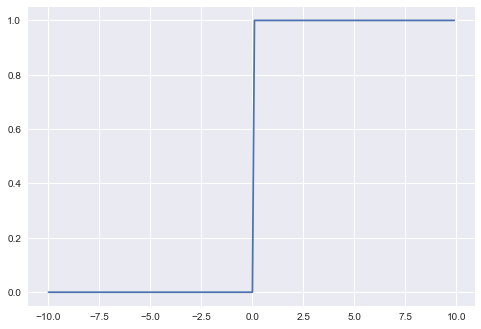

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def paso_unitario(z):
    #Funcion que transforma las entradas positivas en 1 y las entradas negativas en 0.
    activacion = z >= 0 # Transforma los numeros del vector en True y False
    return activacion.astype(int) # Transforma los True y False en 1 y 0 respectivamente


z = np.arange(-10,10,0.1) #Lista con los numeros del -5 al 5, con a espacios de 0.1 de distancia. 
y = paso_unitario(z)
plt.plot(z,y) #Grafica lineal con z como el eje x, y como el eje...y
plt.show() #Despliega la grafica resultante.

El proximo paso es el calculo del error.

## Error

Despues de haber realizado la hipotesis sobre cual sería el valor final de la solución, tenemos que evaluar nuestra solución con el valor real del ejemplo. Si nuestra solución se asemeja a la correcta pues el error es minimo  :), si esta lejos a la solución correcta pues el error es grande :(. En este caso, nuestra función es muy estricta con las soluciones, ya que solo puede tener como valor 1 o 0, y si se equivoca el error es máximo. Para calcularlo, es tan simple como restar el valor de nuestra hipotesis del valor esperado.

In [12]:
def error(esperado,hipotesis):
    return esperado - hipotesis


Luego de haber calculado donde la hipotesis se equivocó, hay que actualizar los pesos del perceptron para minimizar futuras equivocaciones. A este procedimiento se le llama **optimización**.

## Optimización.

En la optimización, se actualizan los valores de los pesos según el valor del error. Esto se hace sumando una parte del error calculado anteriormente a los pesos actuales $w$. En este sentido, si el valor de la hipotesis es menor que el valor esperado, se le agregaría más valor a ese peso. Por otro lado, si el valor de la hipotesis es mayor que el valor esperado, se le quitaría valor a ese peso. Esto hace que, luego de varias optimizaciones, los pesos converjan en ciertos valores que minimizan el error obtenido.  

Sin embargo, si los pesos no están en la misma magnitud que los valores de los ejemplos $x$, el valor actualizado de los pesos no estaría alineado con los datos de ejemplo. Por esto, primero se multiplican los datos de ejemplo por sus respectivos errores, y luego se actualizan los pesos de acuerdo a este producto.Al producto de $x$ y los errores tambien se le multiplica una tasa de aprendizaje $(\alpha)$, la cual determina que tan grandes son las actualizaciones de los pesos. De tal manera terminamos con la siguiente ecuación:

$$ w = w +  \alpha (X^T  \cdot  d) $$

Donde $d$ es el vector de los errores con dimensiones $(m,1)$ y  $X^T$ es la traspuesta de la matriz de ejemplos, con dimensiones $(n,m)$. Al obtener el producto entre ellas, se obtiene una matriz con dimensiones $(n,1)$, el cual concuerda con las dimensiones del peso $w$. Podemos codificar esta ecuación de la siguiente manera:

In [13]:
def actualizacion_pesos(X,w,error, alpha = 1):
    #funcion que actualiza al vector de pesos w según el error d, los datos X y una taza de aprendizaje alpha.
    error_datos = np.dot(X.T,error)
    error_reducido = alpha * error_datos
    actualizacion = w + error_reducido
    return actualizacion

Ya con las partes del perceptron completadas, podemos proceder a juntarlas todas en nuestro Perceptron. Este perceptron repetirá estos cuatro pasos por N iteraciones, hasta que el error sea minimizado. Entonces, nuestro modelo de aprendizaje se verá de la siguiente forma:

##### Algoritmo del Perceptron
    Inicializamos: t = rand(), w = vectorzero()
    repetir:
        for cada ejemplo de entrenamiento (x,y) do:
            for cada parametro j do:
                w_j = w_j - (hipotesis - y) * x_j
            end for
            t = t * (hipotesis - y)
        end for
    Hasta que el cambio en los parametros sea 0.





Vamos a demostrar esto con la funcion booleana logica **NAND**, la cual tiene los siguientes valores: 

$0 \ NAND \  0 = 1 \\ 
 1 \ NAND \ 0 = 1 \\
 0 \ NAND \ 1 = 1 \\
 1 \ NAND \ 1 = 0 $
 

In [23]:
def Graficar_Perceptron(X,y,w):
    datos = pd.DataFrame({'p':X[:,1],'q':X[:,2],'Valor':y})
    sns.lmplot(x = 'p', y ='q', hue = 'Valor', data = datos,fit_reg = False)
    x_min = datos.p.min()
    x_max = datos.p.max()
    y_min = w[0] + x_min * w[1]
    y_max = w[0] + x_max * w[1]
    plt.plot([x_min,x_max],[y_min,y_max],linewidth = 1)
    plt.show()

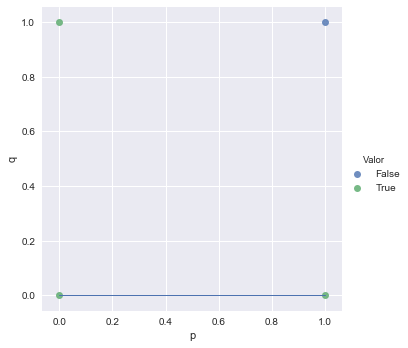

Errores en la iteracion 1: 1
Pesos en la iteracion 1: [-1. -1. -1.]


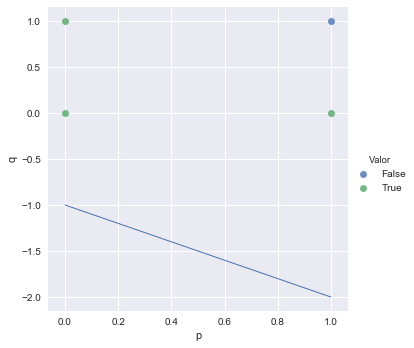

Errores en la iteracion 2: 3
Pesos en la iteracion 2: [ 2.  0.  0.]


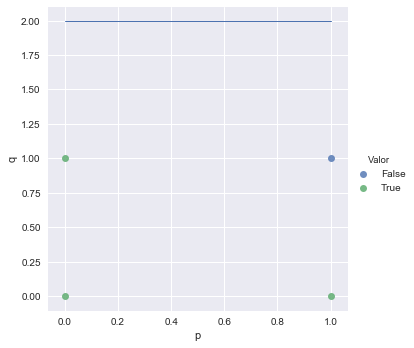

Errores en la iteracion 3: 1
Pesos en la iteracion 3: [ 1. -1. -1.]


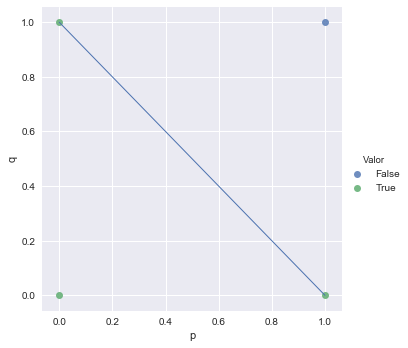

Errores en la iteracion 4: 0
Pesos en la iteracion 4: [ 1. -1. -1.]
Tomo 4 iteraciones


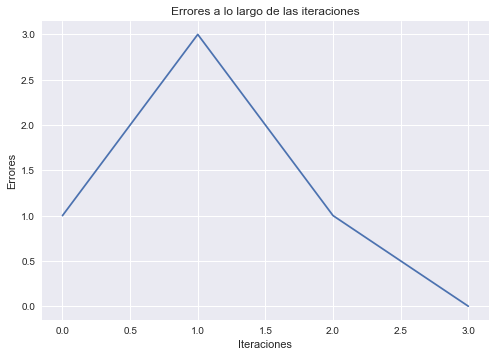

Pesos finales [ 1. -1. -1.]


In [25]:
def Perceptron(X,y,N = 10):
    weights = np.zeros(X.shape[1]) #Inicializar los pesos en 0, y ajustado al numero de columnas en X. 
    errores = []
    
    total_errores = 1  #Pararemos cuando ya no hayan erorres 
    i = 0 # O pasemos de las iteraciones maximas.
    while total_errores and i < N:
        # los 4 pasos.
        Graficar_Perceptron(X,y,weights)
        z = suma_ponderada(X,weights)
        hipotesis = paso_unitario(z)
        d = error(y,hipotesis)
        weights = actualizacion_pesos(X,weights,d)
        
        total_errores = sum(np.absolute(d))
        errores.append(total_errores)
        i += 1
        print("Errores en la iteracion {}: {}".format(i,total_errores))
        print("Pesos en la iteracion {}: {}".format(i,weights))
             
    print("Tomo {} iteraciones".format(i))
    
    #Grafica sobre los errores a lo largo de las iteraciones.
    plt.plot(range(i),errores)
    plt.title("Errores a lo largo de las iteraciones")
    plt.xlabel("Iteraciones")
    plt.ylabel("Errores")
    plt.show()
    print("Pesos finales {}".format(weights))
    return weights


X = np.array([[0,0],[0,1],[1,0],[1,1]]) #Crear la matriz con las posibles combinaciones logicas.
y = np.logical_not(np.logical_and(X[:,0],X[:,1])) #Calcular los valores de 
bias=  np.ones((X.shape[0],1))
X = np.hstack((bias,X))

opt = Perceptron(X,y)

Ya estos pesos finales representan una funcion de manera que: 

$ 0.1 - 0.1x_0 - 0.1x_1 = NAND$  donde el 0.1 solitario equivale al bias.


Vamos a comprobarlo con varias pruebas y con un codigo que representa esta función descrita.

In [26]:
datos_credito = pd.read_csv("datos_credito.csv")
datos_credito.head(10)

,duracion_credito,cantidad_credito,edad,buen_historial_crediticio,incumplimiento
0,6,33187.91,67,0,0
1,48,168948.89,22,1,1
2,12,59505.44,49,0,0
3,42,223769.98,45,1,0
4,24,138259.30,53,1,1
5,36,257071.45,35,1,0
6,24,80485.65,53,1,0
7,36,197253.72,35,1,0
8,12,86845.01,61,1,0
9,30,148593.26,28,0,1
